In [140]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("loans_full_schema.csv")

## First
The data is great at firstsight, since there are not many missing data.

I explored the data with histogram( I didn't leave everything down, since it will makes code really long)

## Clean Data
The variable num_accounts_120d_past_due only includes 0 and NA. This varible is meaningless so I exclude it.

The variable num_accounts_30d_past_due only has one subject in 1, and the other are 0. I think the varible can not predict anything for the interest rate. So I exclude the variable from the model.

The variable current_accounts_delinq has the same problem with num_accounts_30d_past, so I exclude it from the model.

After reading the data, I think the variables, grade and sub_grade, should turn into ordinal data. Since there are relationship such as A>B>C>D>E. So I turn them into numbers.

Also, the varaible term should turn into category since it only has 36 and 60.

The variable earliest_credit_line is time data.

In [74]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [134]:
df['term'] = df['term'].astype(str)

KeyError: 'term'

In [136]:
df['grade'].replace({'A':1, 'B':2 ,'C':3,'D':4,'E':5,'F':6,'G':7}, inplace=True)
df['sub_grade'].replace({'A1':1, 'A2':2 ,'A3':3,'A4':4,'A5':5,
                         'B1':6,'B2':7,'B3':8,'B4':9,'B5':10,
                         'C1':11, 'C2':12 ,'C3':13,'C4':14,'C5':15,
                         'D1':16,'D2':17,'D3':18,'D4':19,'D5':20,
                         'E1':21, 'E2':22 ,'E3':23,'E4':24,'E5':25,
                         'F1':26,'F2':27,'F3':28,'F4':29,'F5':30,
                         'G1':31, 'G2':32 ,'G3':33,'G4':34,'G5':35,
                        }, inplace=True)

In [62]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [63]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

In [84]:
df.corr()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,interest_rate,installment,grade,sub_grade,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.096469,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,0.067415,0.147594,0.019694,-0.015729,0.029997,0.077553,-0.011075,0.007772,-0.099357,0.027457,0.008758,0.067049,NaN,-0.011075,0.082499,0.095866,0.160848,0.115429,0.120279,0.209962,-0.000228,0.018134,0.030083,0.091255,-0.029621,0.075981,-0.029687,-0.034364,0.086768,0.024246,0.018153,0.049517,0.001851
annual_income,0.096469,1.000000,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,-0.008330,0.025976,0.002810,0.001665,-0.000080,0.096542,0.094446,-0.050009,0.176957,NaN,0.001665,0.156078,0.328861,0.123963,0.112329,0.125455,0.243188,-0.010542,0.047439,-0.030568,0.324665,-0.099584,0.315693,-0.096714,-0.105057,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.026157,-0.180445,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,0.217078,0.075174,0.238155,-0.011200,-0.004146,0.024982,0.007342,0.019175,0.200470,0.067724,0.023670,0.217000,NaN,0.007342,0.147478,0.065328,0.128341,0.136041,0.189845,0.033365,0.076636,-0.008522,0.006560,0.056329,0.141653,0.066408,0.134950,0.145494,0.065996,-0.003918,-0.020116,0.121160,-0.010110
annual_income_joint,0.071282,0.724664,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,0.187639,0.493295,0.390667,-0.006926,-0.040135,-0.066533,NaN,0.012387,0.101302,0.055102,-0.029969,0.188730,NaN,NaN,0.145090,0.365135,0.170414,0.128796,0.112621,0.239525,-0.011635,-0.006605,-0.047933,0.330607,-0.165327,0.303795,-0.167026,-0.178064,0.302291,0.108933,0.092761,0.120788,-0.002689
debt_to_income_joint,0.002103,-0.179790,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,0.243765,-0.001495,0.316672,-0.000144,-0.031514,0.031667,NaN,0.002116,0.231431,0.101720,-0.037858,0.243484,NaN,NaN,0.178986,0.025449,0.119194,0.152397,0.232790,-0.078316,0.054834,0.017887,-0.057415,0.045363,0.266417,0.079405,0.261185,0.280210,0.055566,0.001389,-0.025166,0.177931,-0.028840
delinq_2y,0.008242,0.052236,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,0.077680,-0.026574,-0.428286,0.026097,0.011577,0.005762,-0.062541,0.005850,0.012409,NaN,0.026097,-0.026848,-0.085512,0.060118,0.000471,-0.002676,0.063506,-0.444056,-0.005303,-0.044865,-0.033258,0.090456,-0.013724,0.090879,0.094433,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
months_since_last_delinq,0.028790,-0.040392,0.034637,-0.049124,0.065376,-0.566551,1.000000,0.030064,0.022727,-0.014727,-0.002766,-0.061514,0.019946,-0.059018,0.039172,0.711232,-0.025090,-0.001114,0.022848,0.113642,-0.027598,-0.001780,NaN,-0.025090,0.009884,0.034657,-0.033579,-0.003882,0.006803,-0.045417,0.225440,0.008799,0.096420,0.029247,-0.082930,0.008274,-0.077702,-0.089586,0.036517,-0.017350,-0.016431,-0.009362,0.005123
earliest_credit_line,-0.234408,-0.156001,-0.089700,-0.175325,-0.091637,-0.078109,0.030064,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,-0.000813,-0.031572,-0.019322,-0.018333,-0.018070,0.016580,0.024696,-0.010578,-0.172642,NaN,-0.018333,-0.128726,-0.239871,-0.310678,-0.184406,-0.16707

In [46]:
scopechange_homeowenership = df.groupby('homeownership')['interest_rate'].describe()
scopechange_homeowenership

,count,mean,std,min,25%,50%,75%,max
homeownership,,,,,,,,
MORTGAGE,4789.0,12.058868,4.961720,5.31,7.97,10.91,15.04,30.94
OWN,1353.0,12.313991,4.916774,5.31,7.97,11.98,15.05,30.79
RENT,3858.0,12.924959,5.038206,5.31,9.44,11.99,16.01,30.79


In [47]:
scopechange_verified_income = df.groupby('verified_income')['interest_rate'].describe()
scopechange_verified_income

,count,mean,std,min,25%,50%,75%,max
verified_income,,,,,,,,
Not Verified,3594.0,11.099457,4.569159,5.31,7.35,10.41,13.59,30.79
Source Verified,4116.0,12.515479,4.735268,5.31,9.44,11.99,15.05,30.79
Verified,2290.0,14.353747,5.447896,5.31,10.41,13.59,18.06,30.94


## PLOT
I made couple plot with python and I also made other plot with tableau. Please check the pictures in the file.

Some observation I found:

1. The top five interest rate states are: CA, NY, TX, FL, IL

2. When the grade go to G the interest rate go higher. The interesting thing here is that people whose homeownership is mortage have lowest interest rate in this group. In other group, people whose homeownership is mortage have highest interest rate.

3. The correlation between interest rate and paid interest is high.

(array([ 904., 1072.,  485., 1825.,  581., 1228., 1073.,  503.,  480.,
         495.,  343.,  344.,  262.,   41.,   57.,   99.,  138.,    0.,
          31.,   39.]),
 array([ 5.31  ,  6.5915,  7.873 ,  9.1545, 10.436 , 11.7175, 12.999 ,
        14.2805, 15.562 , 16.8435, 18.125 , 19.4065, 20.688 , 21.9695,
        23.251 , 24.5325, 25.814 , 27.0955, 28.377 , 29.6585, 30.94  ]),
 <BarContainer object of 20 artists>)

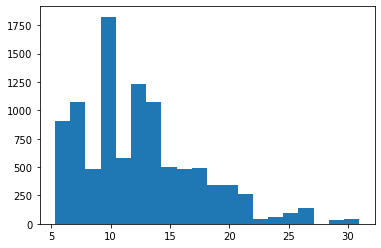

In [59]:
plt.hist(df['interest_rate'],bins=20)

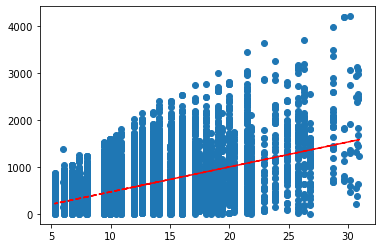

In [32]:
plt.scatter(df['interest_rate'], df['paid_interest'])
x = df['interest_rate']
y = df['paid_interest']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('interest_rate')
plt.ylabel('paid_interest')
plt.show()

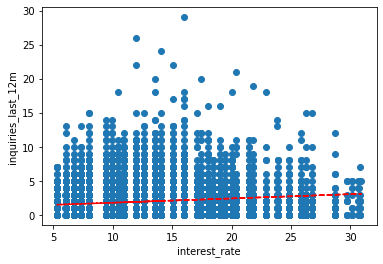

In [33]:
plt.scatter(df['interest_rate'], df['inquiries_last_12m'])
x = df['interest_rate']
y = df['inquiries_last_12m']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('interest_rate')
plt.ylabel('inquiries_last_12m')
plt.show()

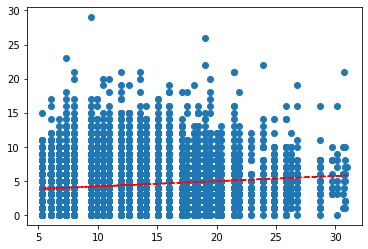

In [26]:
plt.scatter(df['interest_rate'], df['accounts_opened_24m'])
x = df['interest_rate']
y = df['accounts_opened_24m']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

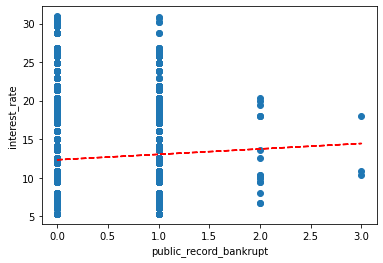

In [53]:
plt.scatter(df['public_record_bankrupt'],df['interest_rate'])
x = df['public_record_bankrupt']
y = df['interest_rate']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('public_record_bankrupt')
plt.ylabel('interest_rate')
plt.show()

In [60]:
import statsmodels.formula.api as smf
from scipy import stats

## linear regression
The model shows that inquiries_last_12m, paid_interest, public_record_bankrupt can predict the interest rate. The Predition can only explain 27.5% of the change of interest rate.

In [61]:
interest_model = smf.ols("interest_rate ~ inquiries_last_12m + paid_interest + public_record_bankrupt + num_historical_failed_to_pay + num_cc_carrying_balance", data= df).fit()

interest_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     757.3
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:53   Log-Likelihood:                -28679.
No. Observations:               10000   AIC:                         5.737e+04
Df Residuals:                    9994   BIC:                         5.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        9.0239      0.094     96.073      0.000       8.840       9.208
inquiries_last_12m               0.1860      0.018     10.297      0.000       0.151       0.221
paid_interest                    0.0049   8.34e-05     58.816      0.000       0.005       0.005
public_record_bankrupt           0.5468      0.147      3.727      0.000       0.259       0.834
num_historical_failed_to_pay     0.0463      0.072      0.645      0.519      -0.094       0.187
num_cc_carrying_balance          0.0046      0.013      0.356      0.722      -0.021       0.030
==============================================================================
Omnibus:                      984.999   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.705
Skew:                           0.825   Prob(JB):                    1.99e-286
Kurtosis:                       3.662   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

## Lasso Regression & Ridge Regression



I exclude some data from the model. Since there are too many variabel, so I use the Ridge Regression, and the prediction score is great. So those variables that I put into the model can explain and predict the interest rate.


Also, I use Lasso Regresstion to check the possiblity of coming up another good model. However, the variables are too many, so the preditcion score is really low. Once I decrease the Alpha, the model become more precise in prediction.

## What would you do if you had more time

I will do further research on the data. Although this data is extremely clean, there more work I can do on the data. Deal with the missing data: I fill 0 to nan since I have no time. But it will be better if I can understand every missing part and maybe just exclude the varaible. 

Outlier: I have no time to check outlier in this case. If I have the time to clean the data, I will check the outlier.

Change the data type: Some of the numerical data are meaningless as a number. They should be change to category, making the data more power. Some data can be changed into ordinal or continouos data.

Clarify the relationship between data: There are amout of similar data in this dataframe. It could exist some situation such as " overfit" in my model. 

Machine learning: If I have more time, I will use the deep machine learing to come up with a better model.

Try more model: I will try more model to make the prediction such as support vector regression, and Xgboost.


In [129]:
df=df.drop(columns=['emp_title','state','homeownership','verified_income'
        ,'verification_income_joint','num_accounts_120d_past_due','num_accounts_30d_past_due'
        ,'loan_purpose','application_type','term','issue_month','loan_status'
       ,'initial_listing_status','disbursement_method','earliest_credit_line']).reset_index()

In [132]:
df=df.fillna(0)

In [138]:
train=df.drop(["interest_rate"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(train,df["interest_rate"],random_state=23)
lasso=Lasso(alpha=10,max_iter=0)
ridge=Ridge()
lasso.fit(X_train,y_train)

print("lasso train model score："+str(r2_score(y_train,lasso.predict(X_train))))#train
print("lasso prediction model score："+str(r2_score(y_test,lasso.predict(X_test))))#wait for predict


Lasso train model score：0.0
Lasso wait to predict score：-0.00318998587886532


/Users/jameswang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 19.055514815248
  model = cd_fast.enet_coordinate_descent(


In [149]:
ridge.fit(X_train,y_train)

print("ridge train model score："+str(r2_score(y_train,ridge.predict(X_train))))#train
print("ridge prediction model score："+str(r2_score(y_test,ridge.predict(X_test))))#wait for predict

ridge train model score：0.9867573985420628
ridge prediction model score：0.9890744370276722


In [146]:
result=pd.DataFrame(columns=["Alpha","lasso train model score","lasso prediction model score","ridge train model score","ridge prediction model score"])
for i in range(1,100):
    alpha=i/10
    ridge=Ridge(alpha=alpha)
    lasso=Lasso(alpha=alpha,max_iter=10000)
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    result=result.append([{"Alpha":alpha,"lasso train model score":r2_score(y_train,lasso.predict(X_train)),"lasso prediction model score":r2_score(y_test,lasso.predict(X_test)),"ridge train model score":r2_score(y_train,ridge.predict(X_train)),"ridge prediction model score":r2_score(y_test,ridge.predict(X_test))}])
    

Text(0, 0.5, 'Score')

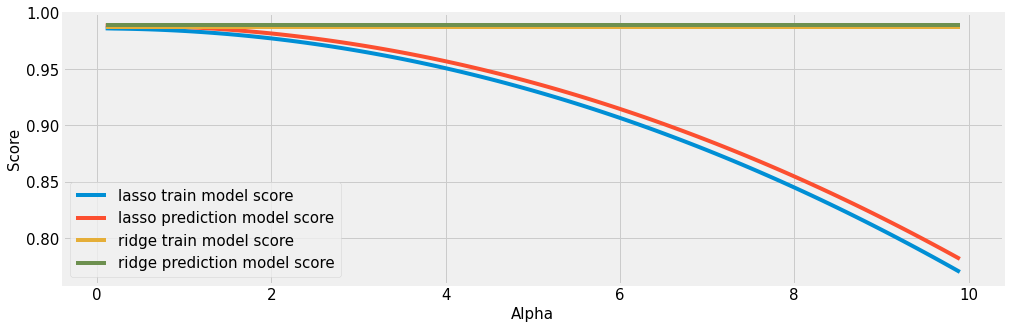

In [148]:
plt.style.use("fivethirtyeight")

%matplotlib inline

fig= plt.subplots(figsize=(15,5))
plt.plot(result["Alpha"],result["lasso train model score"],label="lasso train model score")
plt.plot(result["Alpha"],result["lasso prediction model score"],label="lasso prediction model score")
plt.plot(result["Alpha"],result["ridge train model score"],label="ridge train model score")
plt.plot(result["Alpha"],result["ridge prediction model score"],label="ridge prediction model score")
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Alpha",fontsize=15)
plt.ylabel("Score",fontsize=15)